In [1]:
import pandas as pd
import os
import numpy as np
import string
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
# path of training data
train_path = 'train.xlsx'

# path of testing data
test_path = 'test.xlsx'

In [3]:
# show the first 5 rows of the training data
train_df = pd.read_excel(train_path)
print(train_df.head())

# show the first 5 rows of the testing data
test_df = pd.read_excel(test_path)
print(test_df.head())

                                              report class_name  class_index
0  "For any event on my bookmarked projects" opti...    Backend            1
1           Switch to using full l10n id's in urlbar   Frontend            2
2  Consider removing hasicon property to simplify...   Frontend            2
3  Method to obtain current URL from WebBrowserEd...   Frontend            2
4              Fix: migration fails in MS SQL-Server    Backend            1
                                              report class_name  class_index
0  REST API - ability to list sub projects for a ...    Backend            1
1  support selective text on right if set in GNOM...   Frontend            2
2  [meta][userstory] Ship v1 of Pre-populated top...   Frontend            2
3  Include updated_on and passwd_changed_on colum...    Backend            1
4    Problem with email integration to MS Office 365    Backend            1


In [4]:
def convert_lower_case(data):
    return str(data).lower()

In [5]:
def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in symbols:
        data = np.char.replace(data, i, ' ')

    return str(data)


In [6]:
def remove_apostrophe(data):
    return np.char.replace(data, "'", "")

In [7]:
def remove_numbers(data):
    return re.sub(r'\d+', '', str(data))

In [8]:
def remove_single_characters(tokens):
    new_text = ""
    for w in tokens:
        if len(w) > 1:
            new_text = new_text + " " + w
    return new_text

In [9]:
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(data)
    data = remove_single_characters(tokens)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(word) for word in tokens])
    return lemmatized_output

In [10]:
def preprocess(data):
    data = convert_lower_case(data)
    data = remove_punctuation(data)
    data = remove_apostrophe(data)
    data = remove_numbers(data)
    data = lemmatization(data)
    return data

In [11]:
# print the first report of the training data
print(train_df['report'][0])


"For any event on my bookmarked projects" option not sending notifications for non-member bookmarked projects


In [12]:
# preprocess the first report of the training data
print(preprocess(train_df['report'][0]))


for any event on my bookmarked project option not sending notification for non member bookmarked project


In [14]:
import pandas as pd

# Assuming train_df is your DataFrame containing training data
# Assuming train_df has columns 'id', 'report', and 'class_name'

# Initialize counter
counter = 1

# Iterate over each row in the DataFrame
with open('preprocessed_train_data.csv', 'w', encoding='utf-8') as f:
    f.write('bug_description , class_name\n')  # Write header

    for _, row in train_df.iterrows():
        # Preprocess the 'report' column
        preprocessed_report = preprocess(row['report'])

        # Write data to the file with incremented counter
        f.write(f"{preprocessed_report},{row['class_name']}\n")

# Print the first preprocessed report
print(train_df['report'][0])


"For any event on my bookmarked projects" option not sending notifications for non-member bookmarked projects


In [15]:
# FOR TESTING DATA

# Iterate over each row in the DataFrame
with open('preprocessed_test_data.csv', 'w', encoding='utf-8') as f:
    f.write('bug_description , class_name\n')  # Write header

    for _, row in test_df.iterrows():
        # Preprocess the 'report' column
        preprocessed_report = preprocess(row['report'])

        # Write data to the file with incremented counter
        f.write(f"{preprocessed_report},{row['class_name']}\n")

# Print the first preprocessed report
print(test_df['report'][0])


REST API - ability to list sub projects for a project


In [16]:
# Open the preprocessed data file for reading
with open('preprocessed_train_data.csv', 'r', encoding='utf-8') as f:
    # Open the new file for writing preprocessed data with 2 columns
    with open('preprocessed_train_data2.csv', 'w', encoding='utf-8') as f_out:
        # Iterate over each line in the file
        for i, line in enumerate(f):
            # Skip the header
            if i == 0:
                continue
            
            # Split the line into columns based on comma delimiter
            columns = line.strip().split(',')
            
            # Check the number of columns
            if len(columns) == 2:
                # Get the preprocessed report and class name
                preprocessed_report = columns[0]
                class_name = columns[1]
                
                # Write the preprocessed report and class name to the new file
                f_out.write(f"{preprocessed_report},{class_name}\n")
            else:
                # Skip the line if it doesn't have exactly 2 columns
                continue


In [17]:
# FOR TESTING DATA

# Open the preprocessed data file for reading
with open('preprocessed_test_data.csv', 'r', encoding='utf-8') as f:
    # Open the new file for writing preprocessed data with 2 columns
    with open('preprocessed_test_data2.csv', 'w', encoding='utf-8') as f_out:
        # Iterate over each line in the file
        for i, line in enumerate(f):
            # Skip the header
            if i == 0:
                continue
            
            # Split the line into columns based on comma delimiter
            columns = line.strip().split(',')
            
            # Check the number of columns
            if len(columns) == 2:
                # Get the preprocessed report and class name
                preprocessed_report = columns[0]
                class_name = columns[1]
                
                # Write the preprocessed report and class name to the new file
                f_out.write(f"{preprocessed_report},{class_name}\n")
            else:
                # Skip the line if it doesn't have exactly 2 columns
                continue


In [13]:
# read the preprocessed data from the new file
preprocessed_train_df = pd.read_csv('preprocessed_train_data2.csv')

# show the first 5 rows of the preprocessed training data
print(preprocessed_train_df.head())

                                     bug_description class_name
0  for any event on my bookmarked project option ...    Backend
1               switch to using full ln id in urlbar   Frontend
2  consider removing hasicon property to simplify...   Frontend
3  method to obtain current url from webbrowsered...   Frontend
4                fix migration fails in m sql server    Backend


In [14]:
# read the preprocessed data from the new file
preprocessed_test_df = pd.read_csv('preprocessed_test_data2.csv')

# show the first 5 rows of the preprocessed training data
print(preprocessed_test_df.head())

                                     bug_description class_name
0  rest api ability to list sub project for a pro...    Backend
1  support selective text on right if set in gnom...   Frontend
2  meta userstory ship v of pre populated topsite...   Frontend
3  include updated on and passwd changed on colum...    Backend
4         problem with email integration to m office    Backend


In [16]:
# Remove the stop words from the preprocessed data
from nltk.corpus import stopwords
import nltk
import pandas as pd

# Download the stopwords
nltk.download('stopwords')

# Get the stopwords
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords
def remove_stopwords(text):
    if pd.isna(text):  # Check if the text is NaN
        return ''  # Return an empty string for NaN
    return ' '.join([word for word in text.split() if word not in stop_words])

# Remove stopwords from the preprocessed training data
preprocessed_train_df['bug_description'] = preprocessed_train_df['bug_description'].apply(remove_stopwords)

# Show the first 5 rows of the preprocessed training data
print(preprocessed_train_df.head())

# Remove stopwords from the preprocessed test data
preprocessed_test_df['bug_description'] = preprocessed_test_df['bug_description'].apply(remove_stopwords)

# Show the first 5 rows of the preprocessed test data
print(preprocessed_test_df.head())


                                     bug_description class_name
0  event bookmarked project option sending notifi...    Backend
1                     switch using full ln id urlbar   Frontend
2  consider removing hasicon property simplify st...   Frontend
3         method obtain current url webbrowsereditor   Frontend
4                     fix migration fails sql server    Backend
                                     bug_description class_name
0          rest api ability list sub project project    Backend
1     support selective text right set gnome setting   Frontend
2  meta userstory ship v pre populated topsites a...   Frontend
3  include updated passwd changed column user api...    Backend
4                   problem email integration office    Backend


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Feature Exraction

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Replace NaN values with an empty string
preprocessed_train_df['bug_description'].fillna('', inplace=True)

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed data
X_train = vectorizer.fit_transform(preprocessed_train_df['bug_description'])

# Print the shape of the transformed data
print(X_train.shape)


(13866, 7554)


In [18]:
# print the vector representation of the first report
print(X_train[0])

  (0, 3941)	0.2867814370538413
  (0, 4271)	0.25065705291591717
  (0, 4303)	0.1830150458968057
  (0, 5824)	0.30321105067182264
  (0, 4499)	0.21072049327712647
  (0, 5017)	0.37964711898790154
  (0, 673)	0.6815205652550329
  (0, 2160)	0.2765694466176829


In [19]:
# Print the number of unique class_name in the training data
print(preprocessed_train_df['class_name'].nunique())

# print their unique values
print(preprocessed_train_df['class_name'].unique())

# print the number of reports in each class
print(preprocessed_train_df['class_name'].value_counts())



5
['Backend' 'Frontend' 'Security' 'Documentation' 'Performance']
Backend          7437
Frontend         5799
Security          367
Documentation     174
Performance        89
Name: class_name, dtype: int64


In [20]:
# know we need to apply k-means clustering to the data so that we can group similar reports together
from sklearn.cluster import KMeans

# The clusters are: ['Backend' 'Frontend' 'Security' 'Documentation' 'Performance']
# Initialize the KMeans object
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the data
kmeans.fit(X_train)

# Get the cluster labels
labels = kmeans.labels_

# Print the cluster labels
print(labels)

# Add the cluster labels to the preprocessed data
preprocessed_train_df['cluster'] = labels

# Print the first 5 rows of the preprocessed data
print(preprocessed_train_df.head())

# Print the number of reports in each cluster
print(preprocessed_train_df['cluster'].value_counts())

# Print the number of reports in each class_name
print(preprocessed_train_df['class_name'].value_counts())


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 ... 2 2 2]
                                     bug_description class_name  cluster
0  event bookmarked project option sending notifi...    Backend        2
1                     switch using full ln id urlbar   Frontend        2
2  consider removing hasicon property simplify st...   Frontend        2
3         method obtain current url webbrowsereditor   Frontend        2
4                     fix migration fails sql server    Backend        2
2    11007
0      926
1      857
3      574
4      502
Name: cluster, dtype: int64
Backend          7437
Frontend         5799
Security          367
Documentation     174
Performance        89
Name: class_name, dtype: int64


In [32]:
# make a dictionary so that key is class_name and value is all reports in that class
# Initialize an empty dictionary
X_train_dict = {}

# Iterate over each row in the DataFrame
for _, row in preprocessed_train_df.iterrows():
    # Get the class_name
    class_name = row['class_name']
    
    # Get the report
    report = row['bug_description']
    
    # Check if the class_name is already in the dictionary
    if class_name in X_train_dict:
        # Append the report to the existing list
        X_train_dict[class_name].append(report)
    else:
        # Create a new list with the report
        X_train_dict[class_name] = [report]

# Print the first 5 reports in the 'Backend' class
print(X_train_dict['Backend'][:5])


['event bookmarked project option sending notification non member bookmarked project', 'fix migration fails sql server', 'searching issue number rest api redirects issue html page', 'provide isdenotable api itypebinding differentiate non denotable type', 'email reporting based due date set interval']


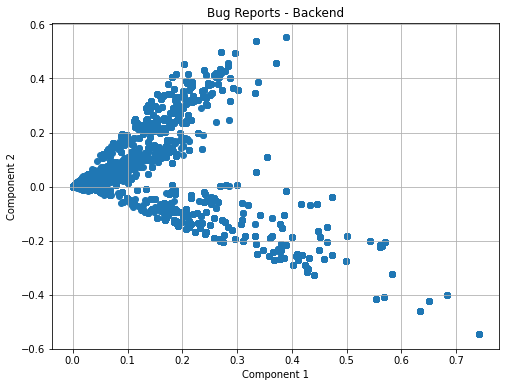

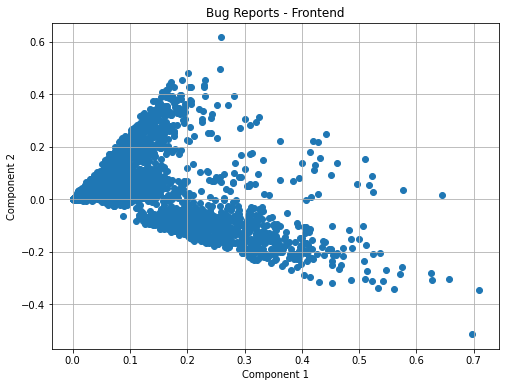

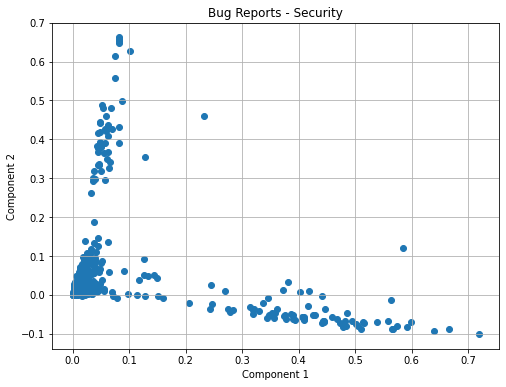

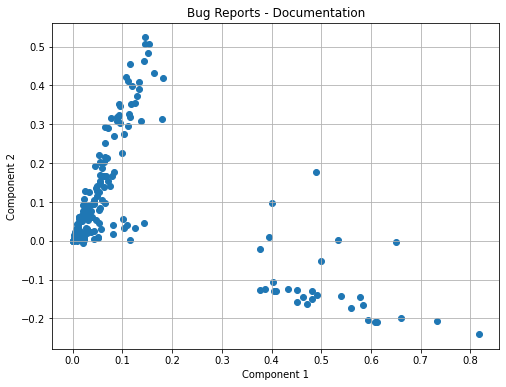

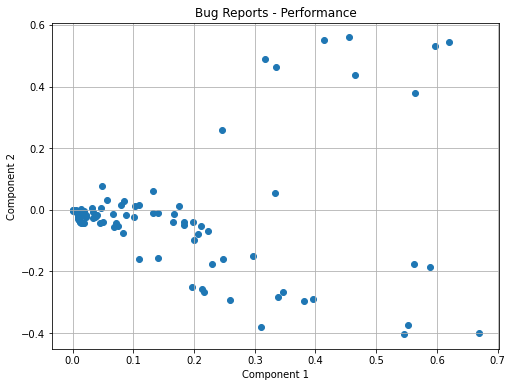

In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Define the categories and their corresponding number of reports
categories = {
    'Backend': 7437,
    'Frontend': 5799,
    'Security': 367,
    'Documentation': 174,
    'Performance': 89
}

# Reduce dimensionality using TruncatedSVD
svd = TruncatedSVD(n_components=2)  # Reduce to 2 dimensions for plotting

# Iterate over each class in X_train_dict
for class_name, reports in X_train_dict.items():
    # Fit TruncatedSVD on reports of the current class
    X_train_class = vectorizer.transform(reports)  # Assuming vectorizer is initialized
    X_svd_class = svd.fit_transform(X_train_class)
    
    # Plot the reports of the current class
    plt.figure(figsize=(8, 6))
    plt.scatter(X_svd_class[:, 0], X_svd_class[:, 1])
    plt.title(f'Bug Reports - {class_name}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()


In [38]:
import plotly.graph_objs as go
from sklearn.decomposition import TruncatedSVD

# Reduce dimensionality using TruncatedSVD
svd = TruncatedSVD(n_components=3)  # Reduce to 3 dimensions for plotting

# Iterate over each class in X_train_dict
for class_name, reports in X_train_dict.items():
    # Fit TruncatedSVD on reports of the current class
    X_train_class = vectorizer.transform(reports)  # Assuming vectorizer is initialized
    X_svd_class = svd.fit_transform(X_train_class)
    
    # Create trace for the current class
    trace = go.Scatter3d(
        x=X_svd_class[:, 0],
        y=X_svd_class[:, 1],
        z=X_svd_class[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            opacity=0.8,
        ),
        name=class_name
    )

    # Create layout
    layout = go.Layout(
        title=f'Bug Reports - {class_name} (3D)',
        scene=dict(
            xaxis=dict(title='Component 1'),
            yaxis=dict(title='Component 2'),
            zaxis=dict(title='Component 3'),
        ),
        margin=dict(l=0, r=0, b=0, t=40),
    )

    # Create figure
    fig = go.Figure(data=[trace], layout=layout)

    # Show interactive plot
    fig.show()


In [39]:
import plotly.graph_objs as go
from sklearn.decomposition import TruncatedSVD

# Reduce dimensionality using TruncatedSVD
svd = TruncatedSVD(n_components=3)  # Reduce to 3 dimensions for plotting

# Create an empty list to store traces for each class
traces = []

# Iterate over each class in X_train_dict
for class_name, reports in X_train_dict.items():
    # Fit TruncatedSVD on reports of the current class
    X_train_class = vectorizer.transform(reports)  # Assuming vectorizer is initialized
    X_svd_class = svd.fit_transform(X_train_class)
    
    # Create trace for the current class
    trace = go.Scatter3d(
        x=X_svd_class[:, 0],
        y=X_svd_class[:, 1],
        z=X_svd_class[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            opacity=0.8,
        ),
        name=class_name
    )
    
    # Append the trace to the list of traces
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Bug Reports (3D)',
    scene=dict(
        xaxis=dict(title='Component 1'),
        yaxis=dict(title='Component 2'),
        zaxis=dict(title='Component 3'),
    ),
    margin=dict(l=0, r=0, b=0, t=40),
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show interactive plot
fig.show()


In [42]:
from itertools import permutations
from sklearn.metrics import confusion_matrix, classification_report

# Replace NaN values with an empty string
preprocessed_test_df['bug_description'].fillna('', inplace=True)

# Transform the preprocessed test data
X_test = vectorizer.transform(preprocessed_test_df['bug_description'])

# Predict the cluster labels for the test data
test_labels = kmeans.predict(X_test)

# Add the cluster labels to the preprocessed test data
preprocessed_test_df['cluster'] = test_labels

# Define the categories and their corresponding number of reports
categories = {
    'Backend': 7437,
    'Frontend': 5799,
    'Security': 367,
    'Documentation': 174,
    'Performance': 89
}

# Initialize variables to store best results
best_conf_matrix = None
best_class_report = None
best_mapping = None

# Iterate over all permutations of class names and cluster labels
for perm in permutations(categories.keys()):
    # Create cluster_class_mapping for the current permutation
    cluster_class_mapping = {i: perm[i] for i in range(len(perm))}

    # Map cluster labels to class names for the test data
    predicted_class_names = preprocessed_test_df['cluster'].map(cluster_class_mapping)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(preprocessed_test_df['class_name'], predicted_class_names)

    # Calculate the classification report
    class_report = classification_report(preprocessed_test_df['class_name'], predicted_class_names)

    # Update best results if necessary
    if best_conf_matrix is None or best_class_report is None:
        best_conf_matrix = conf_matrix
        best_class_report = class_report
        best_mapping = cluster_class_mapping
    else:
        # Check if current mapping has higher F1-score
        curr_f1_score = float(class_report.split()[-2])
        best_f1_score = float(best_class_report.split()[-2])
        if curr_f1_score > best_f1_score:
            best_conf_matrix = conf_matrix
            best_class_report = class_report
            best_mapping = cluster_class_mapping

# Print the confusion matrix
print("Best Confusion Matrix:")
print(best_conf_matrix)

# Print the best classification report
print("\nBest Classification Report:")
print(best_class_report)

# Print the best mapping
print("\nBest Mapping:")
print(best_mapping)


Best Confusion Matrix:
[[155 148 943  35  64]
 [  0   3  18   0   0]
 [  0   7 913  42  25]
 [  0   0  18   0   0]
 [  0   0  67   2   1]]

Best Classification Report:
               precision    recall  f1-score   support

      Backend       1.00      0.12      0.21      1345
Documentation       0.02      0.14      0.03        21
     Frontend       0.47      0.93      0.62       987
  Performance       0.00      0.00      0.00        18
     Security       0.01      0.01      0.01        70

     accuracy                           0.44      2441
    macro avg       0.30      0.24      0.17      2441
 weighted avg       0.74      0.44      0.37      2441


Best Mapping:
{0: 'Backend', 1: 'Documentation', 2: 'Frontend', 3: 'Security', 4: 'Performance'}
